## GDP ANALYSIS OF AFRICAN COUNTRIES 

This notebook focuses on analyzing GDP data of African countries. It examined the top economies in Africa a year before COVID 19, investigated how the continents economy changed during the pandemic. 

#Importing Libraries for data manipulation and visualization.

In [223]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


## Load Dataset
I got my dataset from Kaggle. The dataset is about the GDP of over 100 countries from 1960 - 2020. 

In [198]:
GDP = pd.read_csv("C:/Users/HP/OneDrive/Documents/PYTHON/PANDAS/DATABASES/GDP.csv")

In [200]:
GDP.head()

,year,rank,country,state,gdp,gdp_percent
0,1960,1,the United States,America,543300000000,0.468483
1,1960,2,United Kingdom,Europe,73233967692,0.063149
2,1960,3,France,Europe,62225478000,0.053656
3,1960,4,China,Asia,59716467625,0.051493
4,1960,5,Japan,Asia,44307342950,0.038206


In [202]:
#I filtered the dataset for African countries and for the years 2010 - 2022

Africa_GDP = GDP[(GDP['state'] == 'Africa') & (GDP['year'].between(2010,2022))]

In [204]:
#To see the filtered data

Africa_GDP.head()

,year,rank,country,state,gdp,gdp_percent
7943,2010,29,South Africa,Africa,375349442837,0.005723
7944,2010,30,Nigeria,Africa,361456622215,0.005511
7957,2010,43,Egypt,Africa,218983666061,0.003339
7963,2010,49,Algeria,Africa,161207310515,0.002458
7975,2010,61,Morocco,Africa,93216746661,0.001421


## Top 5 countries by GDP before COVID (2019)
I identified the top 5 African countries by GDP in the year 2019. This will help us understand which countries had the best GDP before COVID

In [206]:
# Filter for the year 2019
Africa_GDP_2019 = Africa_GDP[Africa_GDP['year'] == 2019]

# Sort countries by GDP in descending order
Top_Africa_GDP_2019 = Africa_GDP_2019.sort_values('gdp', ascending=False).head(5)
Top_Africa_GDP_2019[['country', 'gdp']]

,country,gdp
9784,Nigeria,448120428858
9795,South Africa,351431649241
9798,Egypt,303080865603
9814,Algeria,171157803367
9818,Morocco,119700325461


I visualized the top 5 African countries by GDP in the year 2019 using a bar chart.

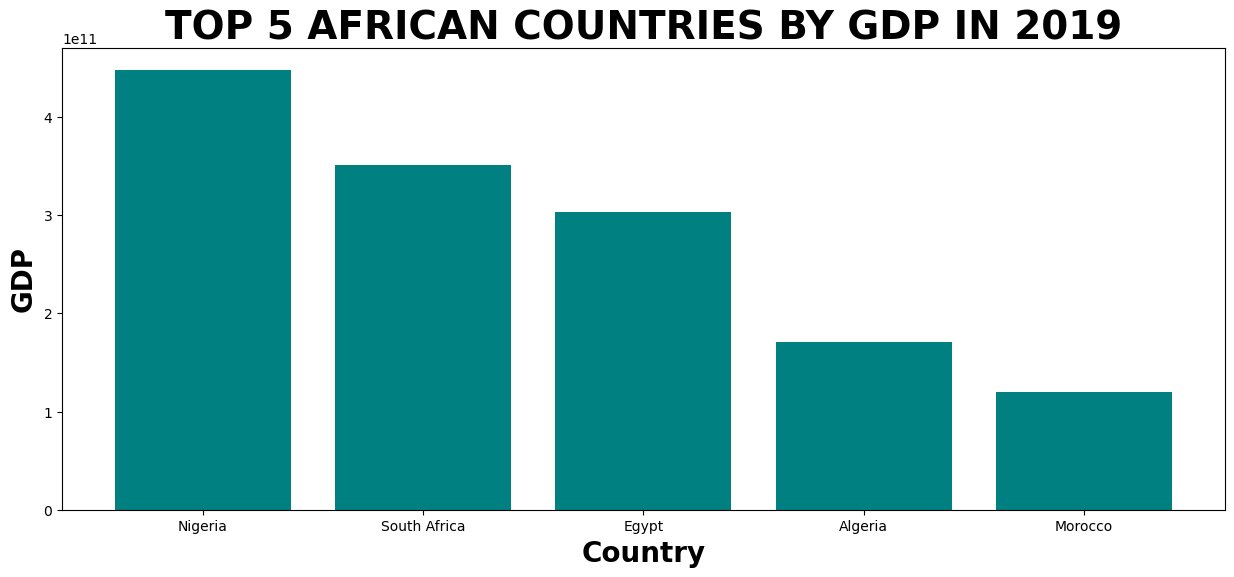

In [208]:
# Plotting the top 5 African countries by GDP in 2019

plt.figure(figsize=(15,6))
plt.bar(Top_Africa_GDP_2019['country'], Top_Africa_GDP_2019['gdp'], color='teal')
plt.title('TOP 5 AFRICAN COUNTRIES BY GDP IN 2019', fontsize = 28, fontweight = 'bold')
plt.xlabel('Country', fontsize = 20, fontweight = 'bold')
plt.ylabel('GDP', fontsize = 20, fontweight = 'bold')
plt.show()

## During Covid, 2020
I examined how top economies in Africa reacted to the pandemic by comparing their economy in the previous year to 2020. 

In [210]:
# Filter for the year 2020
Africa_GDP_2020 = Africa_GDP[Africa_GDP['year'] == 2020]

# Sort countries by hihest GDP
Top_Africa_GDP_2020 = Africa_GDP_2020.sort_values('gdp', ascending=False).head(5)
Top_Africa_SDG_2020[['country', 'gdp']]

,country,gdp
9982,Nigeria,432293776262
9987,Egypt,363069245165
9995,South Africa,301923639269
10013,Algeria,145163902228
10014,Morocco,112870591694


In [212]:
#I used bar chart to exhibit how the top 5 were before COVID and how things changed in 2020

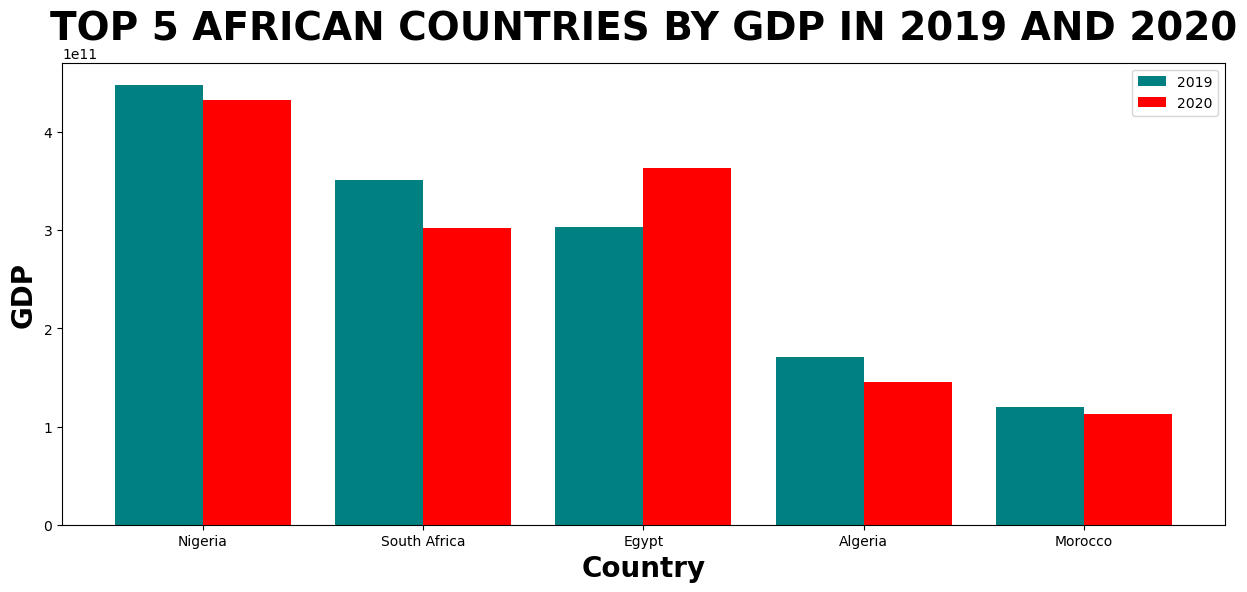

In [271]:
# I created a DataFrame for 2019 and 2020 and merged them for alignment
data_2019 = {'country': ['Nigeria', 'South Africa', 'Egypt', 'Algeria', 'Morocco'],
             'gdp': [448120428858, 351431649241, 303080865603, 171157803367, 119700325461]}
data_2020 = {'country': ['Nigeria', 'Egypt', 'South Africa', 'Algeria', 'Morocco'],
             'gdp': [432293776262, 363069245165, 301923639269, 145163902228, 112870591694]}

Top_Africa_SDG_2019 = pd.DataFrame(data_2019)
Top_Africa_SDG_2020 = pd.DataFrame(data_2020)

merged_data = pd.merge(Top_Africa_SDG_2019, Top_Africa_SDG_2020, on='country', suffixes=('_2019', '_2020'))

plt.figure(figsize=(15,6))

bar_width = 0.4  
index = np.arange(len(merged_data['country']))  

plt.bar(index, merged_data['gdp_2019'], bar_width, color='teal', label='2019')
plt.bar(index + bar_width, merged_data['gdp_2020'], bar_width, color='red', label='2020')

plt.title('TOP 5 AFRICAN COUNTRIES BY GDP IN 2019 AND 2020', fontsize = 28, fontweight = 'bold')
plt.xlabel('Country', fontsize = 20, fontweight = 'bold')
plt.ylabel('GDP', fontsize = 20, fontweight = 'bold')

plt.xticks(index + bar_width / 2, merged_data['country'])

plt.legend(loc='upper right')

plt.show()

In [ ]:
#From the above bar chart, the following can be deduced:
#1. Egypt is the only country among the top 5 to show a positive growth in GDP between 2019 and 2020. In 2019, Egypt had a GDP of approximately $303 billion, and by 2020, it had increased to $363 billion despite the economic distortion caused by COVID 19. 
#2. Nigeria remained Africa’s largest economy, but its GDP dropped from $448 billion in 2019 to $432 billion in 2020.
#3. South Africa saw a notable decline in GDP, dropping from $351 billion in 2019 to $302 billion in 2020. The country faced severe lockdowns and contractions in key sectors. This made them drop to 3rd on the African GDP ranking.

## THE TRENDS OF THESE COUNTRIES FROM 2010 T0 2020
I explored how these countries GDP has changed from 2010 to 2020. Since they usually come among the top in the continent, showing their resillience and adaptability in our unstable world. 

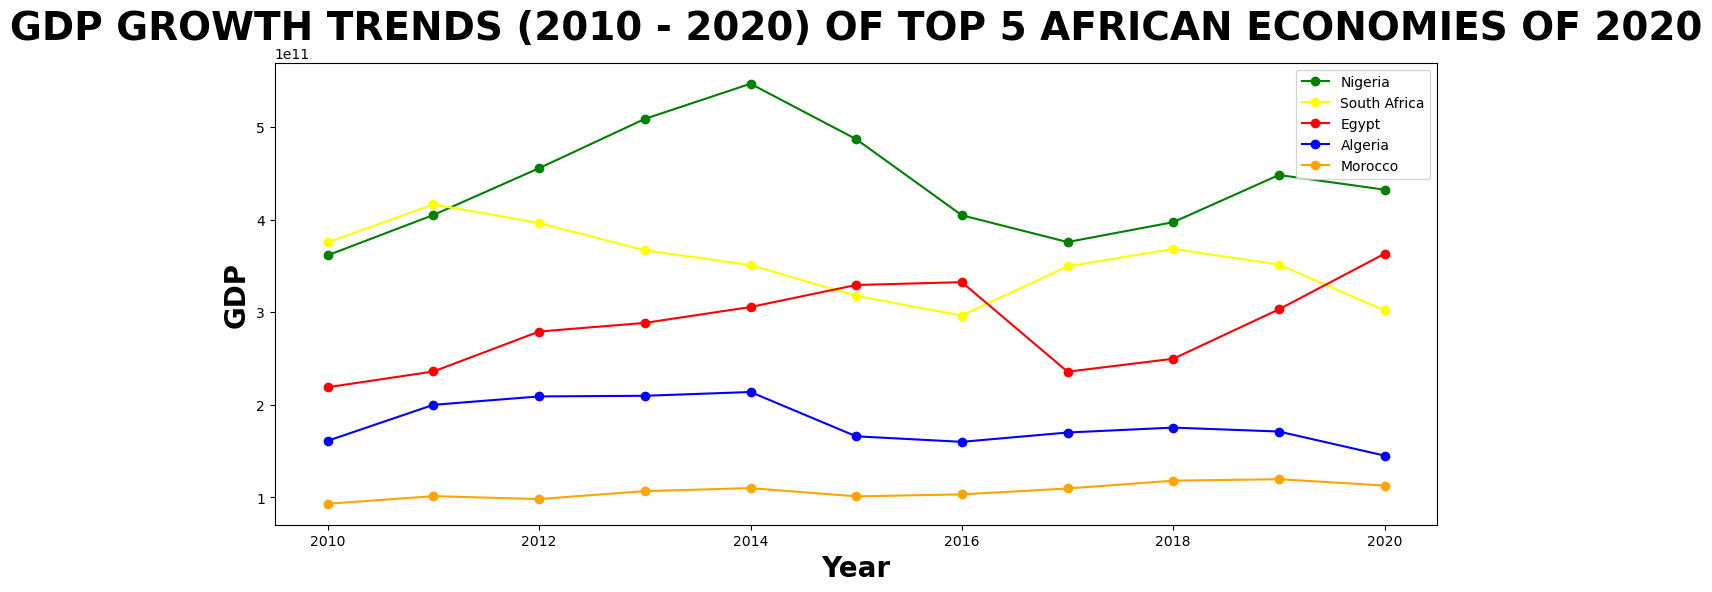

In [285]:
#Let us get the top 10 countries first
Africa_2010_to_2020 = Africa_GDP[(Africa_GDP['country'].isin(['Nigeria', 'South Africa', 'Egypt', 'Algeria', 'Morocco'])) & (Africa_GDP['year'].between(2010, 2020))]

plt.figure(figsize = (15,6))

for country, color in zip(['Nigeria', 'South Africa', 'Egypt', 'Algeria', 'Morocco'],
                          ['green', 'yellow', 'red', 'blue', 'orange']):
    country_data = Africa_2010_to_2020[Africa_2010_to_2020['country'] == country]
    plt.plot(country_data['year'], country_data['gdp'], marker='o', label=country, color=color)

plt.title('GDP GROWTH TRENDS (2010 - 2020) OF TOP 5 AFRICAN ECONOMIES OF 2020', fontsize = 28, fontweight = 'bold')
plt.xlabel('Year', fontsize = 20, fontweight = 'bold')
plt.ylabel('GDP', fontsize = 20, fontweight = 'bold')
plt.legend(loc = 'upper right')

plt.show()

In [287]:
#From the above bar chart, the following can be deduced:
#Nigeria's economy exhibited strong growth in the early part of the decade. 
#However, towards the middle of the decade, there was a sharp slowdown in growth.
#This period was around the global oil price crash in 2014 and as a country whose wealth is mainly from oil, 
#it can be deduced that this is the cause of the slowed growth. 
#However, despite this challenge, Nigeria maintained its position as Africa's largest economy throughout the decade.
